In [1]:
pip install h2o


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import h2o
from h2o.estimators.deeplearning import H2OAutoEncoderEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.451-b10, mixed mode)
  Starting server from C:\Users\maksi\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\maksi\AppData\Local\Temp\tmpy0e59jrr
  JVM stdout: C:\Users\maksi\AppData\Local\Temp\tmpy0e59jrr\h2o_maksi_started_from_python.out
  JVM stderr: C:\Users\maksi\AppData\Local\Temp\tmpy0e59jrr\h2o_maksi_started_from_python.err
  Server is running at http://127.0.0.1:54333
Connecting to H2O server at http://127.0.0.1:54333 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Asia/Yekaterinburg
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,23 days
H2O_cluster_name:,H2O_from_python_maksi_4qnk9y
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.299 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os.path
PATH = os.path.expanduser("~/h2oflows/")

In [7]:
PATH

'C:\\Users\\maksi/h2oflows/'

In [9]:
#данные без аномалий train_ecg И с 3-мя аномальными показателями ЭКГ test_ecg
train_ecg = h2o.import_file("http://s3.amazonaws.com/h2o-public-test-data/smalldata/anomaly/ecg_discord_train.csv")
test_ecg = h2o.import_file("http://s3.amazonaws.com/h2o-public-test-data/smalldata/anomaly/ecg_discord_train.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [11]:
print('Размерность обучающей выборки: ',train_ecg.shape)
print('Размерность тестовой выборки: ',test_ecg.shape)

Размерность обучающей выборки:  (20, 210)
Размерность тестовой выборки:  (20, 210)


C:\Users\maksi\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


C1    2.10
C2    2.13
C3    2.19
C4    2.28
C5    2.44
Name: 0, dtype: float64
float64


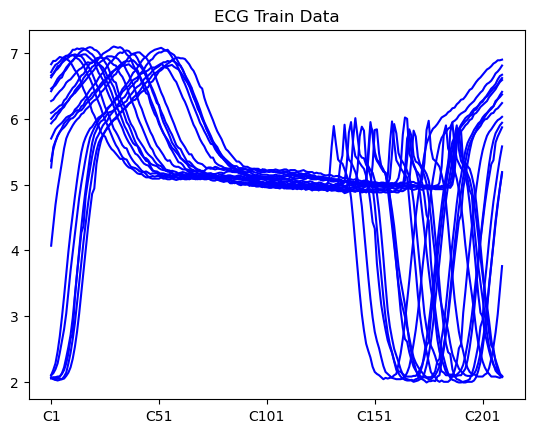

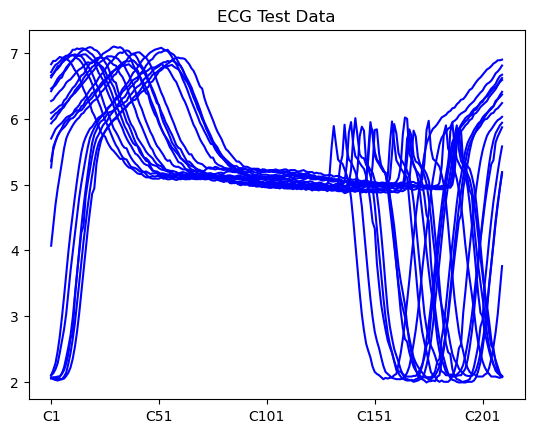

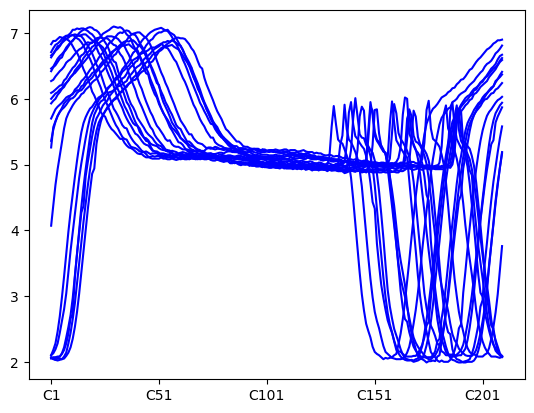

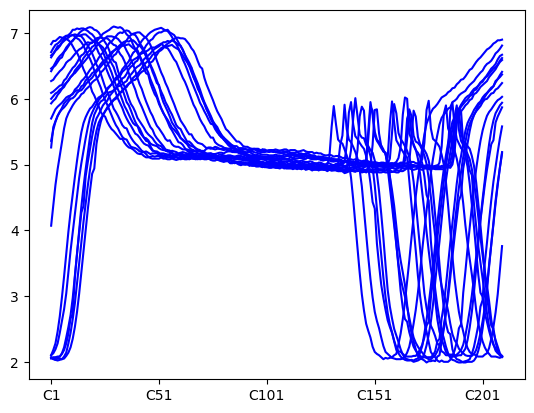

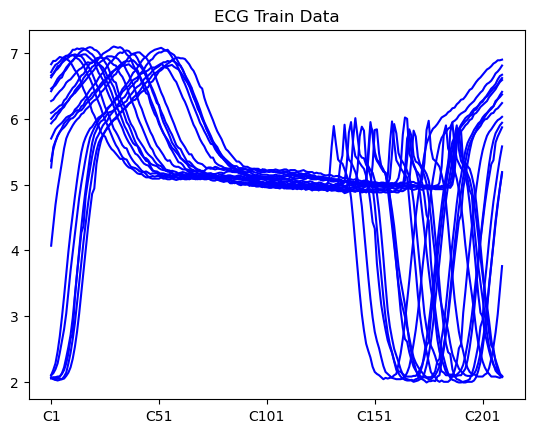

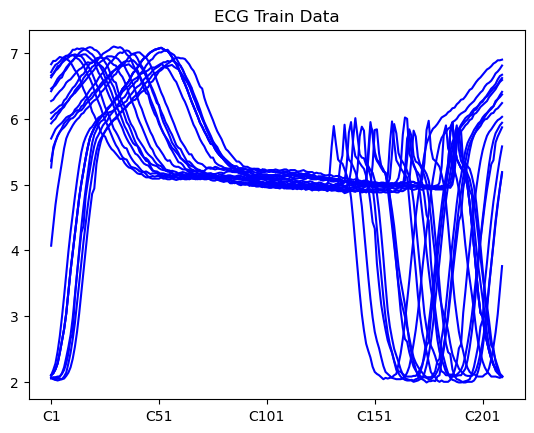

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# пример, как получить данные из h2o frame
df = train_ecg.as_data_frame()

# берем первую строку (или нужную)
series = df.iloc[0]

print(series.head())
print(series.dtype)

series.plot(legend=False, title="ECG Train Data", color='blue')

plt.show()

In [15]:
# cоздаем и обучаем модель
model = H2OAutoEncoderEstimator(
        activation="Tanh",
        hidden=[50],
        l1=1e-5,
        score_interval=0,
        epochs=100
)

model.train(x=train_ecg.names, training_frame=train_ecg)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OAutoEncoderEstimator : Deep Learning
Model Key: DeepLearning_model_python_1745128315479_1


Status of Neuron Layers: auto-encoder, gaussian distribution, Quadratic loss, 21 260 weights/biases, 277,1 KB, 2 000 training samples, mini-batch size 1
    layer    units    type    dropout    l1     l2    mean_rate              rate_rms               momentum    mean_weight           weight_rms           mean_bias              bias_rms
--  -------  -------  ------  ---------  -----  ----  ---------------------  ---------------------  ----------  --------------------  -------------------  ---------------------  --------------------
    1        210      Input   0.0
    2        50       Tanh    0.0        1e-05  0.0   0.0071608885563023035  0.0033125923946499825  0.0         0.003048601302448203  0.09250149130821228  0.003649211543469346   0.026003241539001465
    3        210      Tanh               1e-05  0.0   0.008751464811198059   0.0030828723683953285  0.0         0.003915856883858477  0.0899597704410553   -0.000967995494209722  0.016109071671962738

ModelMetricsAutoEncoder: deeplearning
** Reported on train data. **

MSE: 0.0022186382163998436
RMSE: 0.04710242261709947

Scoring History: 
    timestamp            duration    training_speed    epochs    iterations    samples    training_rmse    training_mse
--  -------------------  ----------  ----------------  --------  ------------  ---------  ---------------  --------------
    2025-04-20 10:52:29  0.612 sec   0,00000 obs/sec   0         0             0          0.38502          0.14824
    2025-04-20 10:52:30  1.106 sec   4149 obs/sec      100       10            2000       0.0471024        0.00221864

Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ---------------------
C151        1.0                    1.0                  0.005827417096826711
C187        0.993635356426239      0.993635356426239    0.005790327664049768
C173        0.9865564703941345     0.9865564703941345   0.005749076042559794
C142        0.9767565131187439     0.9767565131187439   0.005691967603985011
C176        0.9729499220848083     0.9729499220848083   0.005669785010313229
C174        0.9654327630996704     0.9654327630996704   0.005625979389523671
C168        0.9591313600540161     0.9591313600540161   0.00558925848568143
C18         0.9436776638031006     0.9436776638031006   0.005499203351939677
C83         0.9418306946754456     0.9418306946754456   0.005488440292467869
C96         0.9386330246925354     0.9386330246925354   0.005469806135739449
---         ---                    ---                  ---
C79         0.6853395700454712     0.6853395700454712   0.003993759527614846
C13         0.6852474808692932     0.6852474808692932   0.003993222885575153
C14         0.6745054125785828     0.6745054125785828   0.003930624373162587
C85         0.6738271713256836     0.6738271713256836   0.00392667197848967
C2          0.6645247340202332     0.6645247340202332   0.0038724627962937294
C50         0.6599342226982117     0.6599342226982117   0.003845711972132605
C197        0.6412318348884583     0.6412318348884583   0.003736725357658564
C193        0.6264276504516602     0.6264276504516602   0.003650455200166991
C88         0.6241750717163086     0.6241750717163086   0.003637328484332655
C1          0.6106452345848083     0.6106452345848083   0.00355848448011527
[210 rows x 4 columns]


[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [19]:
reconstruction_error = model.anomaly(test_ecg)

In [21]:
# какие данные временных рядов test_ecg, скорее всего, являются аномалией?
df = reconstruction_error.as_data_frame()

C:\Users\maksi\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [23]:
df['Rank'] = df['Reconstruction.MSE'].rank(ascending=False)

In [25]:
df_sorted = df.sort_values('Rank')
df_sorted

,Reconstruction.MSE,Rank
14,0.005041,1.0
4,0.004340,2.0
3,0.003329,3.0
9,0.003080,4.0
16,0.003006,5.0
5,0.002672,6.0
15,0.002405,7.0
6,0.002351,8.0
18,0.002310,9.0
13,0.002266,10.0


In [27]:
anomalies = df_sorted[ df_sorted['Reconstruction.MSE'] > 1.0 ]
anomalies

,Reconstruction.MSE,Rank


In [29]:
data = test_ecg.as_data_frame()

C:\Users\maksi\anaconda3\Lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [31]:
data.T.plot(legend=False, title="ECG Test Data", color='blue')

<Axes: title={'center': 'ECG Test Data'}>

In [35]:
print(data.shape)
print(data.T.shape)
print(anomalies.index)
print(data.index)
print(data.columns)

(20, 210)
(210, 20)
Index([], dtype='int64')
RangeIndex(start=0, stop=20, step=1)
Index(['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10',
       ...
       'C201', 'C202', 'C203', 'C204', 'C205', 'C206', 'C207', 'C208', 'C209',
       'C210'],
      dtype='object', length=210)


In [39]:
if len(anomalies.index) == 0:
    print("Аномалии не найдены — нечего рисовать красным.")
else:
    data.T[anomalies.index].plot(legend=False, title="ECG Anomalies", color='red', ax=ax)

Аномалии не найдены — нечего рисовать красным.


In [37]:
ax = data.T.plot(legend=False, color='blue')
data.T[anomalies.index].plot(legend=False, title="ECG Anomalies in the Data", color='red', ax=ax);

TypeError: no numeric data to plot

In [41]:
from h2o.estimators.isolation_forest import H2OIsolationForestEstimator

In [43]:
isofor_model = H2OIsolationForestEstimator(sample_size = 5, ntrees=7)

In [45]:
isofor_model.train(training_frame = train_ecg)

perf = isofor_model.model_performance()
perf

isolationforest Model Build progress: |██████████████████████████████████████████| (done) 100%


ModelMetricsAnomaly: isolationforest
** Reported on train data. **

Anomaly Score: 1.3494987468671678
Normalized Anomaly Score: 0.44418859649122805

In [47]:
test_pred = isofor_model.predict(test_ecg)
test_pred

isolationforest prediction progress: |███████████████████████████████████████████| (done) 100%


predict,mean_length
0.375,1.42857
0.125,1.71429
0.125,1.71429
0.25,1.57143
0.375,1.42857
0.375,1.42857
0.25,1.57143
0,1.85714
0,1.85714
0.125,1.71429
